In [2]:
# import lib
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [3]:
# dataset
x = np.array(([0.9,0.8],[0.6,0.3],[0.9,0.1],[0.9,0.8]))
y = np.array(([0],[1],[1],[0]))

In [4]:
# activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Mulity-layers feedforward neural network (2 hidden layers)
class NeuralNetwork:
    # constructor
    def __init__(self , x , y , nodes_in_layer1 = 4 , nodes_in_layer2 = 3 , nodes_in_layer3 = 1 , l_rate = 1):
        # definde x ,y
        self.inputs_in_layer0 = x
        self.y = y

        # definde and set the number of nurons in each layers
        self.nodes_in_layer1 = nodes_in_layer1
        self.nodes_in_layer2 = nodes_in_layer2
        self.nodes_in_layer3 = nodes_in_layer3
        self.l_rate = l_rate

        # weights (theta) metrix
        self.thetas_layer0 = np.random.rand(self.inputs_in_layer0.shape[1] + 1,self.nodes_in_layer1)
        self.thetas_layer1 = np.random.rand(self.nodes_in_layer1 + 1,self.nodes_in_layer2)
        self.thetas_layer2 = np.random.rand(self.nodes_in_layer2 + 1,nodes_in_layer3)

    # feedforward 
    def feedforward(self):
       n = self.inputs_in_layer0.shape[0]

       self.Z1 = self.thetas_layer0[0] + np.dot(self.inputs_in_layer0,self.thetas_layer0[1:])
       self.layer1 = sigmoid(self.Z1)

       self.Z2 = self.thetas_layer1[0] + np.dot(self.layer1,self.thetas_layer1[1:])
       self.layer2 = sigmoid(self.Z2)

       self.Z3 = self.thetas_layer2[0] + np.dot(self.layer2,self.thetas_layer2[1:])
       self.layer3 = sigmoid(self.Z3)

       return self.layer3
    
    def cost_func(self):
        self.n = self.inputs_in_layer0.shape[0]
        self.cost = (1/self.n) * np.sum((self.y - self.feedforward())**2)
        return self.cost
    
    def backprop(self):
        # derivative of E with respect to theta and bias layer2
        self.dE_dlayer3 = (1/self.n) * (self.layer3-y)/(self.layer3*(1-self.layer3))
        self.dE_dZ3 = np.multiply(self.dE_dlayer3,(sigmoid(self.Z3)*(1-sigmoid(self.Z3))))
        self.dE_dtheta2 = np.dot(self.layer2.T,self.dE_dZ3)
        self.dE_dbias2 = np.dot(np.ones((self.n)),self.dE_dZ3)

        # derivative of E with respect to theta and bias layer1
        self.dE_dlayer2 = np.dot(self.dE_dZ3,self.thetas_layer2[1:].T)
        self.dE_dZ2 = np.multiply(self.dE_dlayer2,(sigmoid(self.Z2)*(1-sigmoid(self.Z2))))
        self.dE_dtheta1 = np.dot(self.layer1.T,self.dE_dZ2)
        self.dE_dbias1 = np.dot(np.ones((self.n)),self.dE_dZ2)

        # derivative of E with respect to theta and bias layer0
        self.dE_dlayer1 = np.dot(self.dE_dZ2,self.thetas_layer1[1:].T)
        self.dE_dZ1 = np.multiply(self.dE_dlayer1,(sigmoid(self.Z1)*(1-sigmoid(self.Z1))))
        self.dE_dtheta0 = np.dot(self.inputs_in_layer0.T,self.dE_dZ1)
        self.dE_dbias0 = np.dot(np.ones((self.n)),self.dE_dZ1)

        # update theta using gradient descent layer2,1,0
        self.thetas_layer2[1:] = self.thetas_layer2[1:] - self.l_rate * self.dE_dtheta2
        self.thetas_layer1[1:] = self.thetas_layer1[1:] - self.l_rate * self.dE_dtheta1
        self.thetas_layer0[1:] = self.thetas_layer0[1:] - self.l_rate * self.dE_dtheta0

        # update bias using gradient descent layer2,1,0
        self.thetas_layer2[0] = self.thetas_layer2[0] - self.l_rate * self.dE_dbias2
        self.thetas_layer2[1:] = self.thetas_layer2[1:] - self.l_rate * self.dE_dtheta2
        self.thetas_layer1[0] = self.thetas_layer1[0] - self.l_rate * self.dE_dbias1

        return self


In [5]:
NN = NeuralNetwork(x,y)
epochs = 1000
losses = []
for i in range(epochs):
    predicted_output = NN.feedforward()
    error = NN.cost_func()
    losses.append(error)
    NN.backprop()
    print('''
    ========================== ==========================
    ''')
    print("itration #",i+1)
    print("actual_output = ",y)
    print("predicted_output = ",predicted_output)
    print("loss = ",error)


    ========================== ==========================
    
itration # 1
actual_output =  [[0]
 [1]
 [1]
 [0]]
predicted_output =  [[0.88618906]
 [0.88460465]
 [0.88496265]
 [0.88618906]]
loss =  0.3993029458677775

    ========================== ==========================
    
itration # 2
actual_output =  [[0]
 [1]
 [1]
 [0]]
predicted_output =  [[0.46404308]
 [0.46554059]
 [0.46482559]
 [0.46404308]]
loss =  0.2506826195264624

    ========================== ==========================
    
itration # 3
actual_output =  [[0]
 [1]
 [1]
 [0]]
predicted_output =  [[0.51037253]
 [0.51143735]
 [0.51084956]
 [0.51037253]]
loss =  0.24973046297385643

    ========================== ==========================
    
itration # 4
actual_output =  [[0]
 [1]
 [1]
 [0]]
predicted_output =  [[0.49247638]
 [0.49372846]
 [0.49308613]
 [0.49247638]]
loss =  0.2495846288473584

    ========================== ==========================
    
itration # 5
actual_output =  [[0]
 [1]
 [1]
 [0]]
predicte

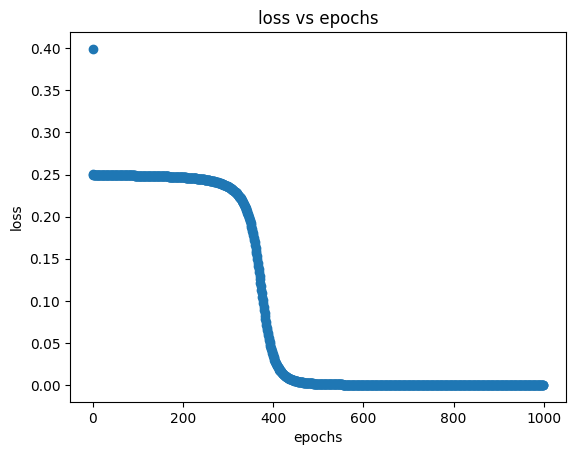

In [6]:
plt.scatter(range(epochs),losses)
plt.title('loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()